In [1]:
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('rice.jpg')

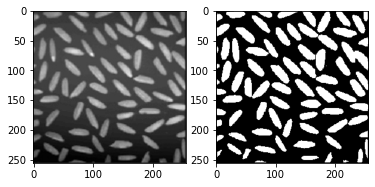

In [2]:
'''
單一閥值:
高過一個數值就設為白色
潛在問題:怎麼定閥值
'''
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img,cmap='gray')
ax2 = fig.add_subplot(122)
#大於100的設為白色
ax2.imshow(img>80,cmap='gray')
plt.show()

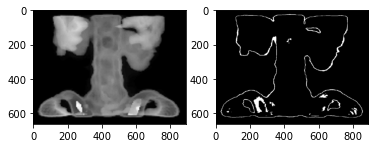

In [3]:
'''
雙重閥值:
介於某兩個數值內的設為白色
其他設為黑色
'''
s = io.imread('bone.jpg')

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(s,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow((s>40) & (s<80),cmap='gray')

plt.show()

<ipython-input-4-387f5ced4457>:23: RuntimeWarning: invalid value encountered in true_divide
  mu_f = (kpc[-1]-kpc)/wf


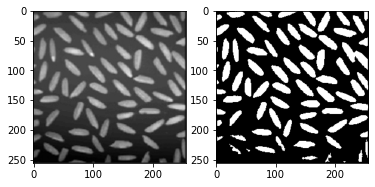

In [4]:
'''
設定合適的閥值:Ostu演算法
'''

from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
c = io.imread('rice.jpg')
k= np.arange(256)
#做成直方圖
n= ndi.histogram(c,0,255,256)
#把直方圖正規化 成機率分布(integral is 1)
p = n/(c.size + 0.0)
#算CDF:WB
#這邊的CDF是一個LIST 對應直方圖每點的累積分布
wb = np.cumsum(p)
#1-cdf: Wf
wf = 1-wb
kpc= np.cumsum(k*p)
#算出兩邊的期望值
mu_b = kpc/wb
mu_f = (kpc[-1]-kpc)/wf
t=128
#單純做10次
for i in range(10):
    t1 = int((mu_f[t]+mu_b[t])/2.0)
    t=t1
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(c,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(c> t,cmap='gray')
plt.show()

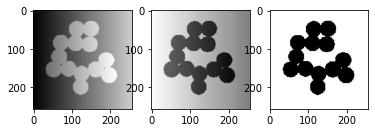

In [5]:
'''
可適性閥值運算:
把影像切成不同區塊去做OSTU
'''
from skimage import io,filters
import matplotlib.pyplot as plt
import numpy as np

cs = io.imread('circles.jpg')
r,c = cs.shape
#切成很多小塊
x, y = np.mgrid[0:r,0:c].astype(float)
p2 = 255.0-cs+y/2
#套件的OTSU
t= filters.threshold_otsu(p2)

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(p2,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(p2> t,cmap='gray')

plt.show()


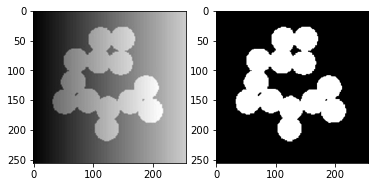

In [6]:
'''
預先知道哪裡對結果造成影響，就先切掉
'''
from skimage import io,filters
import matplotlib.pyplot as plt
import numpy as np

r,c = cs.shape
z = np.zeros((r,c))
zc = np.zeros((r,c))
offset = 64
for i in range(4):
    start = i*offset
    end = start + offset
    temp = cs[:,start:end]
    zc[:,start:end]= temp
    z[:,start:end] = (temp>filters.threshold_otsu(temp))*1.0
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(zc,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(z,cmap='gray')
plt.show()


In [7]:
'''
邊緣偵測
邊緣強度:gradient intensity
邊緣方向:gradient direction (往數值大的地方)
'''


'\n邊緣偵測\n邊緣強度:gradient intensity\n邊緣方向:gradient direction (往數值大的地方)\n'

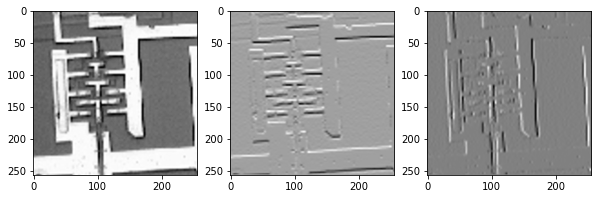

In [8]:
'''
Prewitt 濾波器
'''
cs = io.imread('circuit.jpg')
sx = filters.prewitt_h(cs)
sy = filters.prewitt_v(cs)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(sx,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(sy,cmap='gray')

plt.show()

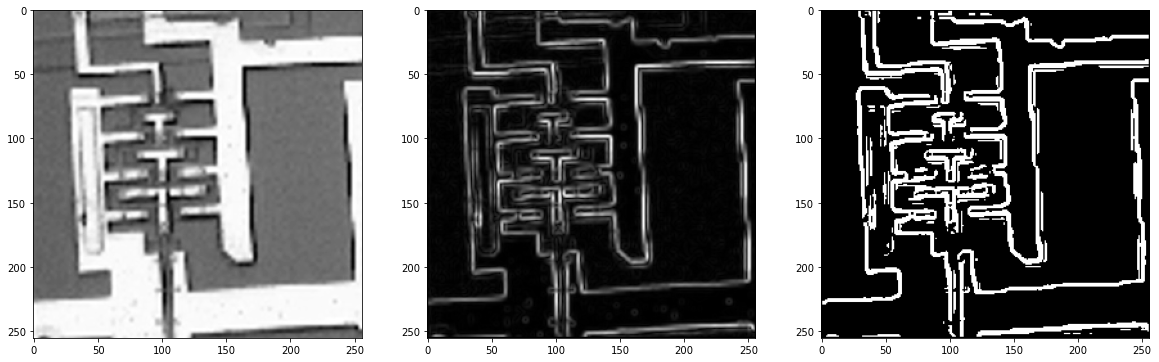

In [9]:
sx = filters.prewitt_h(cs)
sy = filters.prewitt_v(cs)
#edge:算出 gradient的長度
edge = np.sqrt(sx*sx+sy*sy)
t= filters.threshold_otsu(edge)

fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(edge,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(edge>t,cmap='gray')
plt.show()

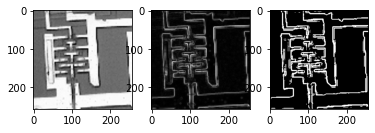

In [10]:
'''
Roberts cross gradient filters:
偵測斜方向的EDGE
執行速度快很多(因為implement不必用convolution)
只要是ORTHOGONAL??

'''
from skimage import io,filters
import matplotlib.pyplot as plt

edge = filters.roberts(cs)

t= filters.threshold_otsu(edge)

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(edge,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(edge>t,cmap='gray')

plt.show()


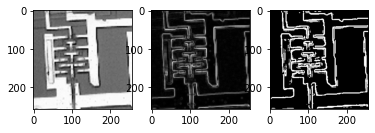

In [11]:
'''
Sobel濾波器
對曲線、圓 效果會比另外兩個好
'''
sx = filters.sobel_h(cs)
sy= filters.sobel_v(cs)
edge = np.sqrt(sx*sx+sy*sy)

t= filters.threshold_otsu(edge)
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(edge,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(edge>t,cmap='gray')
plt.show()

In [12]:
'''
一階導數: 邊緣偵測
二階導數: 主要用來找CORNER(轉折點) Laplacian是二階的
'''

'\n一階導數: 邊緣偵測\n二階導數: 主要用來找CORNER(轉折點) Laplacian是二階的\n'

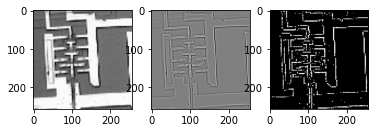

In [13]:
'''
Laplacian
'''
cs = io.imread('circuit.jpg')
edge = filters.laplace(cs)

t= filters.threshold_otsu(edge)

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(edge,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(edge<t,cmap='gray')

plt.show()

In [14]:
'''
Marr-Hildreth 方法：
1.使用高斯濾波器來平滑影像。 (因為要先把雜訊減少)
2.使用Laplacian 濾波器對結果進行旋積。
3.找出零交錯。

'''

'\nMarr-Hildreth 方法：\n1.使用高斯濾波器來平滑影像。 (因為要先把雜訊減少)\n2.使用Laplacian 濾波器對結果進行旋積。\n3.找出零交錯。\n\n'

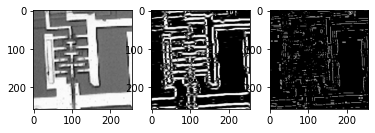

In [15]:
cs = io.imread('circuit.jpg')
#Laplacian and Guassian
LoG = ndi.gaussian_laplace(cs,2)
thres = np.absolute(LoG).mean()*0.75
output = np.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]
#找零交錯
for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(cs,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(LoG,cmap='gray')
ax3 = fig.add_subplot(133)
ax3.imshow(output,cmap='gray')
plt.show()

In [16]:
'''
Canny 邊緣偵測
1.影像為x。
2.產生一維高斯濾波器g。
3.產生對應方程式的一維濾波器dg。
4.將g 與dg 旋積，得到gdg。
5.將x 代入gdg，產生x1。 (X方向梯度)
6.將x 代入gdg’，產生x2。 (y方向梯度)
7.使用算式求得邊緣影像 Xe=root(x1^2+x2^2)
8.對Xe非最大值抑制

    非最大值抑制（non-maximum suppression）:
        梯度方向最大的才保留 (可讓邊緣偵測的結果圖邊緣細一點)
'''

'\nCanny 邊緣偵測\n1.影像為x。\n2.產生一維高斯濾波器g。\n3.產生對應方程式的一維濾波器dg。\n4.將g 與dg 旋積，得到gdg。\n5.將x 代入gdg，產生x1。 (X方向梯度)\n6.將x 代入gdg’，產生x2。 (y方向梯度)\n7.使用算式求得邊緣影像 Xe=root(x1^2+x2^2)\n8.對Xe非最大值抑制\n\n    非最大值抑制（non-maximum suppression）:\n        梯度方向最大的才保留 (可讓邊緣偵測的結果圖邊緣細一點)\n'

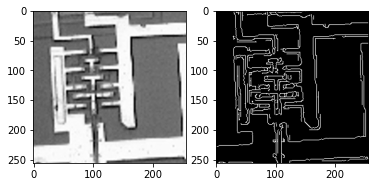

In [17]:
import cv2

img = cv2.imread('circuit.jpg',0)
#Canny的後慢兩個參數是 EDGE的臨界值(一個下(minVal)一個上(maxVal))
#高過maxVal一定是邊
#低於minVal捨棄
#在之間的話和一錠是邊的相連才是邊
edges = cv2.Canny(img,100,200)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(img,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(edges,cmap='gray')
plt.show()


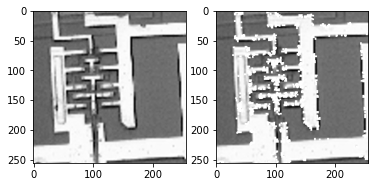

In [18]:
'''
角隅偵測
'''
from PIL import Image
from matplotlib import pyplot as plt

def draw_point(image, x, y, radius = 1):
    """Draw a point centered at (x, y) with specified radius."""
    for dx in range(-radius, radius + 1):
        for dy in range(-radius, radius + 1):
            image.putpixel((x+dx, y+dy), 255)

def draw_corners(image, corners_map):
    """Draw a point for each possible corner."""
    for corner in corners_map:
        draw_point(image, corner[0], corner[1])
def moravec(image, threshold = 100):
    """Moravec's corner detection for each pixel of the image."""
    corners = []
    xy_shifts = [(1, 0), (1, 1), (0, 1), (-1, 1)]

    for y in range(1, image.size[1]-1):
        for x in range(1, image.size[0]-1):
            # Look for local maxima in min(E) above threshold:
            E = 100000
            for shift in xy_shifts:
                diff = image.getpixel((x + shift[0], y + shift[1]))
                diff = diff - image.getpixel((x, y))
                diff = diff * diff
                if diff < E:
                    E = diff
            if E > threshold:
                corners.append((x, y))
    return corners
threshold = 100

# Find corners:
image = Image.open('circuit.jpg').convert("L")
corners = moravec(image, threshold)
image1 = Image.open('circuit.jpg').convert("L")
draw_corners(image1, corners)
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.imshow(image,cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(image1,cmap='gray')
plt.show()


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_org = cv2.imread('cameraman.tif',0)
img = cv2.imread('cameraman.tif',0)
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(img,50,200)
x, y = np.nonzero(edges)
xt = np.array([x]).T
yt = np.array([y]).T
th = np.linspace(0, np.pi,180)
cos_th = np.array([np.cos(th)])
sin_th = np.array([np.sin(th)])
rtable=np.floor(xt.dot(cos_th)+yt.dot(sin_th))


ValueError: not enough values to unpack (expected 2, got 1)